In [1]:
import ifcb, glob, os

In [2]:
fnames = sorted(glob.glob("/opt/ifcb-data/power-buoy-deployment/D20210*.roi"))
fnames

['/opt/ifcb-data/power-buoy-deployment/D20210608T182507_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T183617_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T200541_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T202438_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T210144_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T231045_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T232820_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T234319_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210608T234915_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210609T000729_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210609T003111_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210609T005454_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210609T011836_IFCB161.roi',
 '/opt/ifcb-data/power-buoy-deployment/D20210609T014218_IFCB161.roi',
 '/opt/ifcb-data/pow

In [34]:
for i, fname in enumerate(fnames):
    if i < 1000:
        files = ifcb.open_raw(fname)
        files.to_zip("/u/pdaniel/ifcb-scripts/data/{}.zip".format(os.path.basename(os.path.splitext(fname)[0])))
    else:
        break

## Look for large Files ##

In [3]:
import numpy as np
import zipfile, glob
from PIL import Image
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xw0dl3yh because the default path (/u/pdaniel/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.DataFrame(columns=["pid","size"])
for zip_name in tqdm(sorted(glob.glob('data/*.zip'))):
    with zipfile.ZipFile(zip_name, "r") as zip_data:
        sizes = []
        names = []
        content_list = zip_data.namelist()
        for name_file in content_list:
            if name_file.endswith('.png'):
                img_bytes = zip_data.open(name_file)          # 1
                img_data = Image.open(img_bytes)
                sizes.append(img_data.size[0])
                names.append(zip_name)
        df = df.append(pd.DataFrame(data={"pid":names, "size":sizes}),ignore_index=True)

100%|██████████| 360/360 [00:31<00:00, 11.35it/s]


In [6]:
df['dateTime'] = pd.to_datetime(df['pid'].apply(lambda x: x.split("/")[1].split("_")[0][1:]))

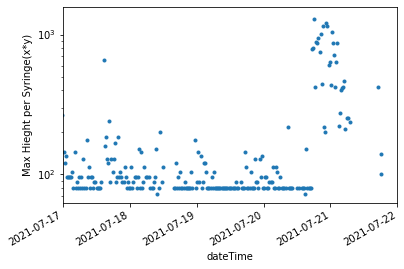

In [7]:
fig, ax = plt.subplots()
df.groupby("dateTime")['size'].max().plot(marker='.',lw=0,ax=ax)
ax.set_xlim("20210717","20210722")
ax.set_ylabel("Max Hieght per Syringe(x*y)")
ax.set_yscale('log')

In [31]:
fname = "/opt/ifcb-data/power-buoy-deployment/D20210612T011358_IFCB161.roi"
files = ifcb.open_raw(fname) # creates an FilesetBin Object, this links each of the files
z = ifcb.open_zip("D20210612T011358_IFCB161.zip")
directory = ifcb.DataDirectory('/opt/ifcb-data/power-buoy-deployment/2021')

In [33]:
directory.

<function ifcb.data.files.DataDirectory.<lambda>(x)>

In [17]:
files.headers

{'context': 'SoftwareVersion: 2.0.2.0',
 'AnalogFirmware': 45,
 'HousekeepingFirmware': 32,
 'sampleNumber': 7,
 'sampleType': 'Normal',
 'triggerCount': 4,
 'roiCount': 3,
 'humidity': 58.75411764705884,
 'temperature': 19.727480735484868,
 'runTime': 404.0328125,
 'inhibitTime': 0.23360243055555555,
 'ADCFileFormat': 'trigger#, ADCtime, PMTA, PMTB, PMTC, PMTD, PeakA, PeakB, PeakC, PeakD, TimeOfFlight, GrabTimeStart, GrabTimeEnd, RoiX, RoiY, RoiWidth, RoiHeight, StartByte, ComparatorOut, StartPoint, SignalLength, Status, RunTime, InhibitTime',
 'DAQ_MCCserialPort_DAC_MCConly': '/dev/ttyS2',
 'auxPower1': False,
 'autoStart': False,
 'autoShutdown': True,
 'HumidityAlarmThreshold(%)': 90,
 'ValveHumidityHysteresis_DAC_MCConly': 567,
 'FanTemperatureThreshold_DAC_MCConly': 30744,
 'FanTemperatureHysteresis_DAC_MCConly': 123,
 'valveDelay': 781,
 'FlashlampControlVoltage': 2.8,
 'HKTRIGGERtoFlashlampDelayTime_x434ns_DAC_MCConly': 120,
 'FlashlampPulseLength_x434ns_DAC_MCConly': 20,
 'Cam

In [19]:
files.to_zip("{}.zip".format(os.path.basename(os.path.splitext(fname)[0]))) # This will create a zip of the .pngs from the ROI files

In [23]:
# You can open the zip get the filenames or even open them
with zipfile.ZipFile("D20210612T011358_IFCB161.zip", "r") as zip_data:
        content_list = zip_data.namelist()
        print(content_list)
        img_bytes = zip_data.open("D20210612T011358_IFCB161_00004.png")          # 1
        img_data = Image.open(img_bytes)

['metadata.json', 'D20210612T011358_IFCB161_headers.json', 'D20210612T011358_IFCB161.csv', 'D20210612T011358_IFCB161_00002.png', 'D20210612T011358_IFCB161_00003.png', 'D20210612T011358_IFCB161_00004.png']


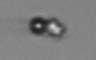

In [24]:
img_data